In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [22]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [23]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1) 


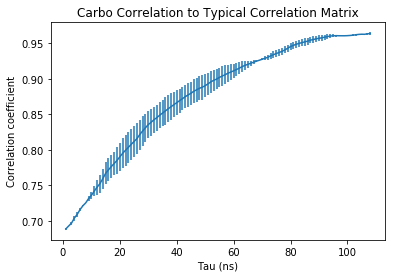

In [24]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('Carbo Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Carbo_max_correlation_to_equaltime.png')

Bars are standard error

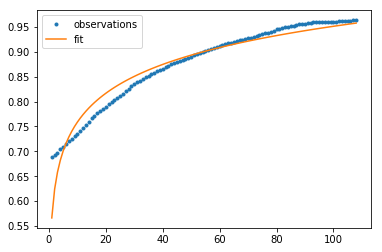

In [25]:
np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.08368419*log(x) + 0.56612751
yhat = 0.08368419*np.log(taus) + 0.56612751
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_Carbo_prop_max_correlation_to_equaltime.png')

$$y = 0.08368419*log(x) + 0.56612751$$

[ -3.67322871e-01  -1.99067850e-02   1.04353131e+00  -3.07372650e-04]


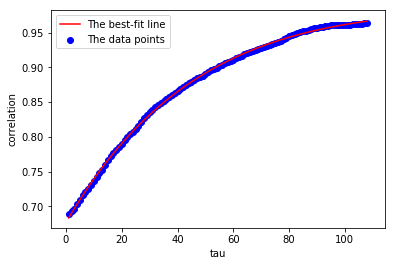

In [26]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(1.18,-.26,0,0))
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_Carbo_prop_max_correlation_to_equaltime.png')

$$y = -3.67322871\times10^{-01} e^{-1.99067850\times10^{-02}x} + 1.04353131 e^{-3.07372650\times10^{-04}x}$$

[ -2.12097859e+01  -5.50945535e-03  -1.70117770e+03  -5.53894132e-03
   1.72307048e+03  -5.53284902e-03]


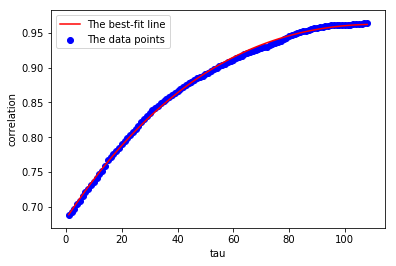

In [27]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(0.8,0.03,0,0,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_Carbo_prop_max_correlation_to_equaltime.png')

$$y = -2.12097859\times10^{1} e^{-5.50945535\times10^{-03}x} + -1.70117770\times10^{3} e^{-5.53894132\times10^{-3}x} + 1.72307048\times10^{3} e^{-5.53284902\times10^{-3}}$$

# Time Lagged

In [17]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1) 

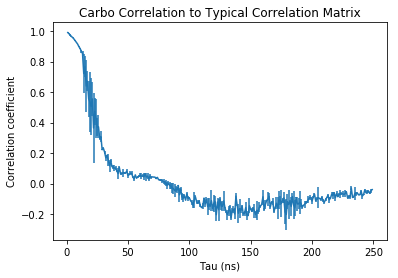

In [18]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('Carbo Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Carbo_TL_correlation_to_equaltime.png')

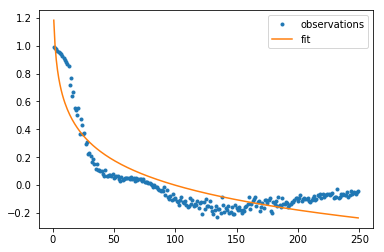

In [19]:
np.polyfit(np.log(TLtaus), TLaverage, 1)
#y = -0.25699047*log(x) + 1.18252178
yhat = -0.25699047*np.log(TLtaus) + 1.18252178
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_Carbo_TL_correlation_to_equaltime.png')

$$y = -0.25699047*log(x) + 1.18252178$$

[ 1.41692606 -0.03221835 -0.248454   -0.00405177]


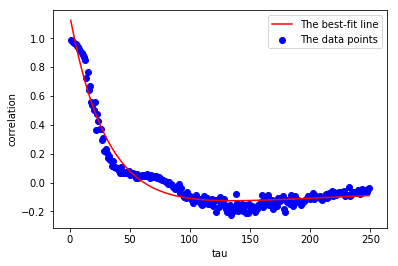

In [20]:
popt, pcov = curve_fit(func,TLtaus,TLaverage,p0=(1.18,-.26,0,0))
print(popt)
curvey = func(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus,TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_Carbo_TL_correlation_to_equaltime.png')

$$y = 1.41692606 e^{-0.03221835x} + -0.248454 e^{-0.00405177x}$$

[  0.7213469   -0.05300765 -10.42409884  -0.01150648  10.91172006
  -0.01230051]


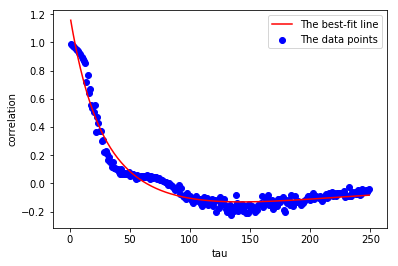

In [28]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.5,-0.013,-3.5,-.013,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_Carbo_TL_correlation_to_equaltime.png')

$$y = 0.7213469 e^{-0.05300765x} + -10.42409884 e^{-0.01150648x} + 10.91172006 e^{-0.01230051x}$$